In [1]:
import os
import shutil
import argparse
import importlib.util
from importlib import reload

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from alad_mod.alad import ALAD
from data.hlf_dataset_utils import *
from data.hlf_preprocessing import HLFDataPreprocessorV2, load
from evaluation.basic_evaluator import BasicEvaluator
from evaluation import alad_plot_utils

In [2]:
data_file = '/home/oliverkn/pro/data/hlf_set_new/sm_mix_valid.npy'
x = np.load(data_file)

In [3]:
result_path = '/home/oliverkn/euler/results/hlf_set/alad/2_l21/'
model_file = 'model-17000000'

# loading config
spec = importlib.util.spec_from_file_location('config', os.path.join(result_path, 'config.py'))
config = importlib.util.module_from_spec(spec)
spec.loader.exec_module(config)

# loading preprocessor
preprocessor = load(os.path.join(result_path, 'preprocessor.pkl'))

# loading alad
tf.reset_default_graph()
ad = ALAD(config, tf.Session())
ad.load(os.path.join(result_path , 'model-17000000'))

W0928 21:04:10.799628 140496962950976 lazy_loader.py:50] 
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

W0928 21:04:11.008390 140496962950976 deprecation_wrapper.py:119] From /home/oliverkn/cloud/eth/2019_FS/pro/pycharm/alad_mod/alad.py:29: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0928 21:04:11.011937 140496962950976 deprecation_wrapper.py:119] From /home/oliverkn/cloud/eth/2019_FS/pro/pycharm/alad_mod/alad.py:44: The name tf.variable_scope is deprecated. Please use tf.compat.v1.variable_scope instead.

W0928 21:04:11.013168 140496962950976 deprecation.py:323] From /home/oliverkn/euler/results/hlf_set/alad/2_l21/config.py:85: den

In [4]:
print('---------- PREPROCESS DATA ----------')
x_transformed = preprocessor.transform(x)

print('---------- COMPUTING ANOMALY SCORES ----------')
scores = ad.get_anomaly_scores(x_transformed, type='fm')

---------- PREPROCESS DATA ----------
---------- COMPUTING ANOMALY SCORES ----------


In [57]:
efficiency = 1e-3

threshold = np.quantile(scores, 1.0-efficiency)
idx = scores > threshold
x_anomalous = x[idx]
x_normal = x[np.logical_not(idx)]

print('number of normal events: ' + str(x_normal.shape[0]))
print('number of anomalous events: ' + str(x_anomalous.shape[0]))

number of normal events: 3446826
number of anomalous events: 3451


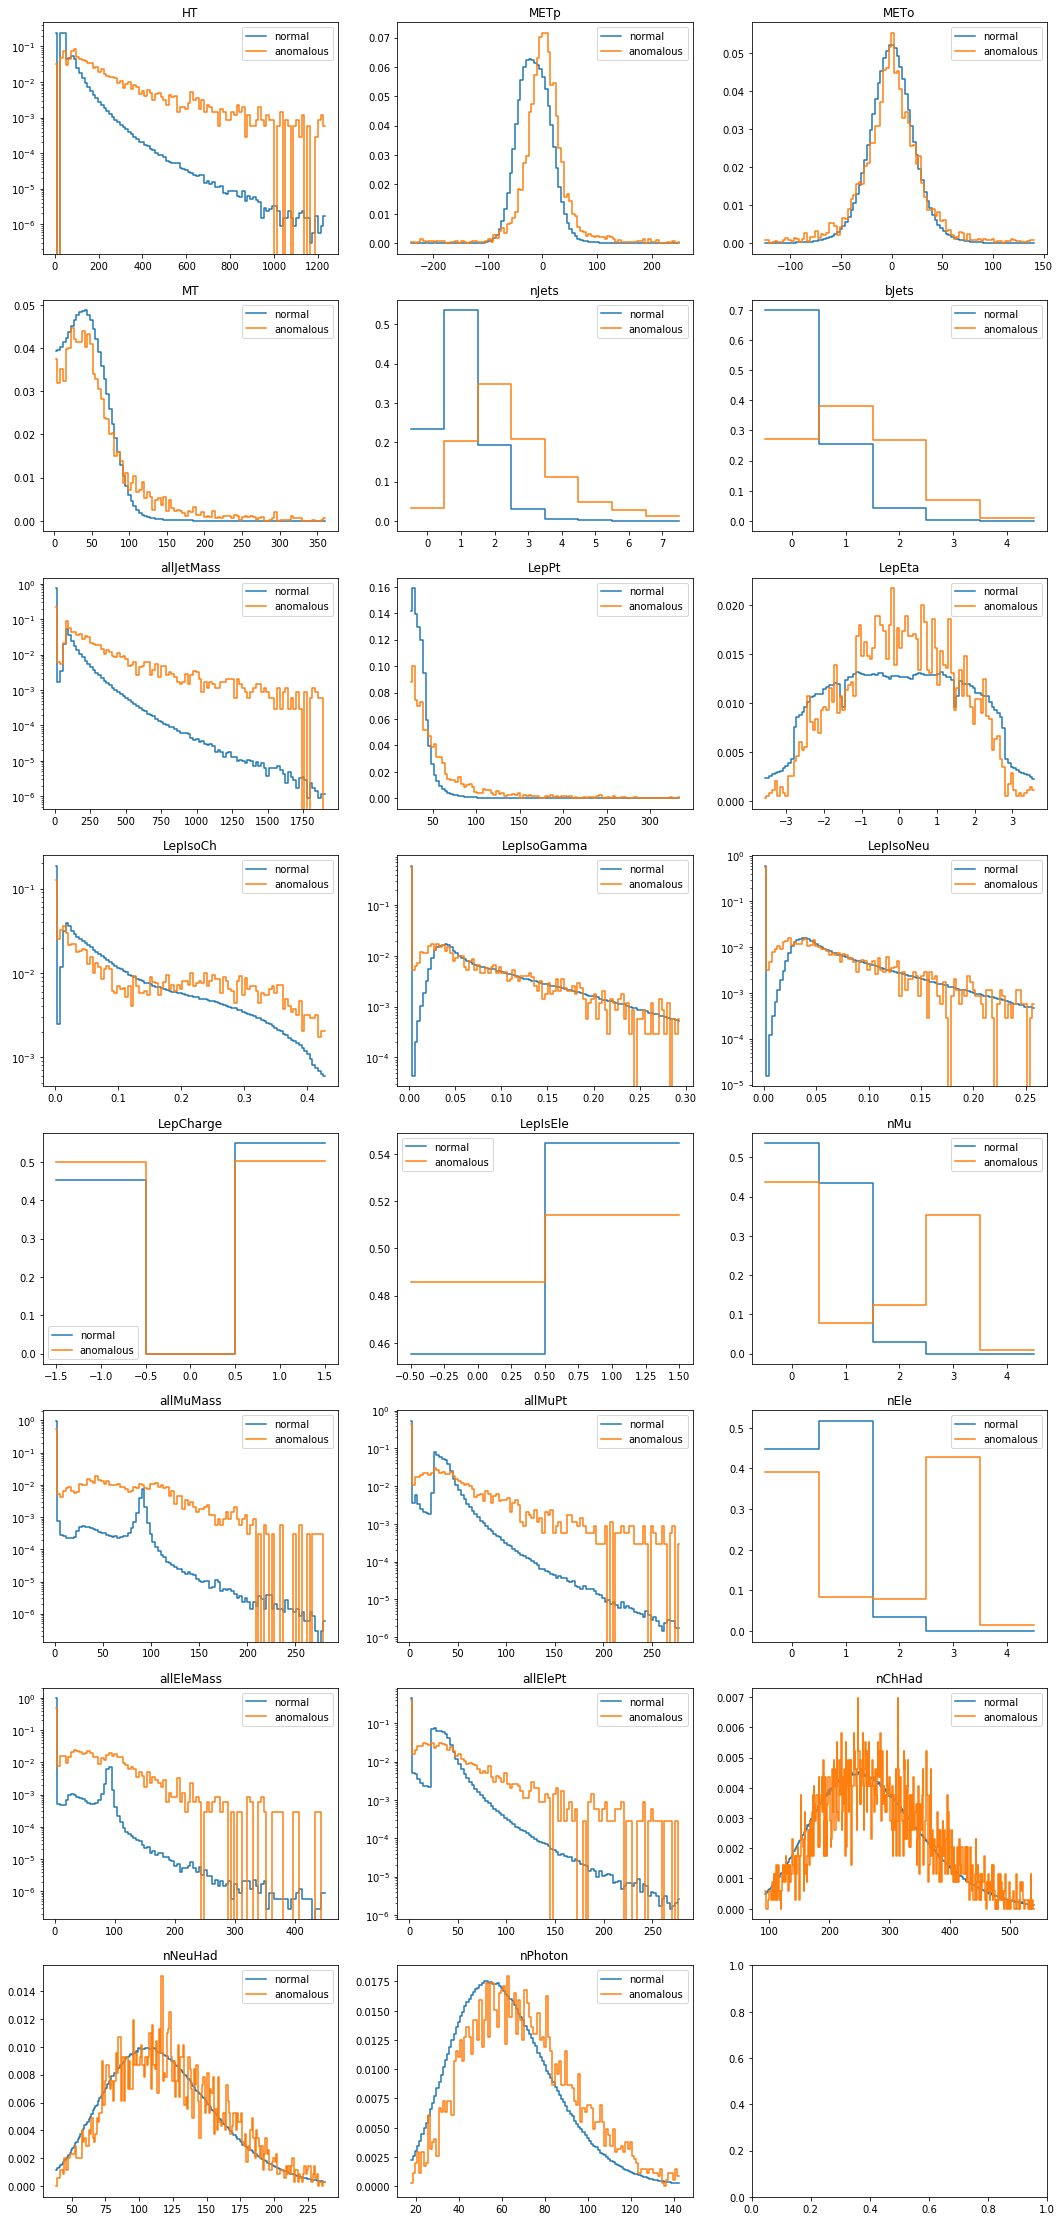

In [56]:
reload(alad_plot_utils)
alad_plot_utils.plot_sim_hlf([x_normal, x_anomalous], ['normal', 'anomalous'])